In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import graph_func as gf

In [2]:
filename = 'C:/Users/Andrew/Desktop/ML/parsing/gallery.csv'

columns = ['author', 'name', 'material', 'technic', 'genre', 'style', 'v_size',
       'h_size', 'year', 'price']

In [3]:
df = pd.read_csv(filename, sep=',', encoding='utf8')

In [4]:
df.shape

(11378, 10)

In [5]:
df.head(20)

,author,name,material,technic,genre,style,v_size,h_size,year,price
0,Ovcharenko Eduard,Spring,Холст,Масло,Landscape,Impressionism,80,60,2015,9880.0
1,Ovcharenko Eduard,March in the Park,Холст,Масло,Landscape,Expressionism,60,40,2003,9880.0
2,Ovcharenko Eduard,Melody. Listening To Bach,Картон,Масло,Portrait,Impressionism,70,110,1958,9880.0
3,Skopov Yuri,Suprematist signal,Холст,Масло,Abstraction,Abstract art,101,60.5,1994,2540.0
4,Skubko Sergey,Autumn in the mountains,Холст,Масло,Landscape,Impressionism,80,60,1961,2540.0
5,Skubko Sergey,Sunny day in Suzdal,Холст,Масло,Landscape,Impressionism,60,70,1981,2540.0
6,Krasheninnikov Alexander,Impenetrable forest,Холст,Масло,Landscape,Realism,75,60,1994,1240.0
7,Fedosov Nikita,Trinity-Sergius Lavra,Холст,Масло,Landscape,Impressionism,49,35,Unknown,2540.0
8,"Tishin Vyacheslav,Horace’s Tree,""Canvas, the"",...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tishin Vyacheslav,Rainbow,Canvas,Print,Abstraction,Abstract art,40,60,2008,250.0


Some rows contain all information in the first column. My bad. Data in these rows contain comma except as a separator.

Let's see how many wrong rows we have in our dataframe.

In [6]:
df.isnull().sum()

author        0
name        191
material    191
technic     191
genre       209
style       272
v_size      195
h_size      210
year        191
price       378
dtype: int64

We have 191 bad rows. But much worse that we have 187 rows with NaN in the price column. We can repair bad data, but data with NaN in the price column don't have any sense to us. For begins lets except these columns from our data. It's not a good decision, but we have 11000 rows to exploration anyway.

In [7]:
df = df[df['price'].notnull()]

In [8]:
df.isnull().sum()

author       0
name         0
material     0
technic      0
genre       18
style       68
v_size       2
h_size      17
year         0
price        0
dtype: int64

Not so bad. We can work with this data. For example, we can fill empty cells value 'Unknown'.

Actually we already scrapped 1885 cells the year column with value 'Unknown'. 

In [9]:
print(df['year'][df['year']=='Unknown'].count())

1885


In [10]:
df[df['h_size'].isnull()]

,author,name,material,technic,genre,style,v_size,h_size,year,price
612,Filippov Yuriy,Autumn in Shirayevskaya galleries,Canvas/cardboard,Oil,Landscape,Impressionism,48,NaN,2006,10000.0
628,Filippov Yuriy,On a country road,Cardboard,Oil,Landscape,Realism,3046,NaN,1958,10000.0
1751,Ilyasova Alfiya,Madonna,Canvas,Oil,Genre painting,Symbolism,90,NaN,Unknown,3060.0
5057,Arkadev Kirill,Cast construction in Moscow,paper,Гелевые,Portrait,Surrealism,3,NaN,2009,2570.0
5767,Tokun Tatyana,Caretakers,"Дерево, железо, стекло, пластик",Ассамбляж,Abstraction,Conceptual art,NaN,NaN,2016,1650.0
7387,Radtke Alexander,Monada,Canvas,Oil,Landscape,Abstract art,40,NaN,2017,3210.0
7394,Radtke Alexander,Somewhere in the air,Canvas,Oil,Abstraction,Abstract art,55,NaN,2017,3860.0
7400,Radtke Alexander,Castles in the air,Canvas,Oil,Landscape,Abstract art,40,NaN,2017,3000.0
7750,Pastukhov Konstantin,BioStal,Ватман,Графит,Abstraction,Abstract art,4,NaN,2016,500.0
8441,Arkadev Kirill,Mill,paper,Гелевые,Portrait,Surrealism,4,NaN,Unknown,1710.0


We see that 3 rows have error and value v_size must be split v_size and h_size. Let's do it and then fill 'NaN' and 'Unknown' value with '0'.

In [11]:
df.loc[(df['author'] == 'Filippov Yuriy') & (df['name'] == 'On a country road'), 'v_size'] = 30
df.loc[(df['author'] == 'Filippov Yuriy') & (df['name'] == 'On a country road'), 'h_size'] = 46
df.loc[(df['author'] == 'Filippov Yuriy') & (df['name'] == 'Still Life with Jug and flowers on a background of mountains'), 'v_size'] = 70
df.loc[(df['author'] == 'Filippov Yuriy') & (df['name'] == 'Still Life with Jug and flowers on a background of mountains'), 'h_size'] = 110
df.loc[(df['author'] == 'Filippov Yuriy') & (df['name'] == 'Winter holiday') & (df['year'] == '1992'), 'v_size'] = 100
df.loc[(df['author'] == 'Filippov Yuriy') & (df['name'] == 'Winter holiday') & (df['year'] == '1992'), 'h_size'] = 100
df['v_size'].fillna('0', inplace=True)
df['h_size'].fillna('0', inplace=True)
df.loc[df['v_size'] == 'Unknown', 'v_size'] = '0'
df.loc[df['h_size'] == 'Unknown', 'h_size'] = '0'

I'm not so creative person to define genre or style painting, so we fill all 'NaN' cell value 'Unknown'.

In [12]:
df['genre'].fillna('Unknown', inplace=True)
df['style'].fillna('Unknown', inplace=True)

Let's see how many unique values in our dataframe

In [13]:
for i in columns:
    print(i + ' - ' + str(df[i].nunique()))

author - 547
name - 8824
material - 149
technic - 244
genre - 10
style - 9
v_size - 294
h_size - 315
year - 82
price - 475


Interesting that painters not so original in naming a picture. About 20 % name repeated.

Now we will check how many authors have only one picture in our data.

In [14]:
temp_df = df.groupby(['author'])['name'].count().reset_index(name='count')
print(temp_df['author'][temp_df['count'] == 1].count())

71


It's bad. We can't much discover about these authors.

How about authors with a maximum number of pictures in our data?

In [15]:
temp_df.sort_values(('count'),ascending=False).iloc[:20]

,author,count
125,Filippov Yuriy,392
265,Kulebakin Nikolay,309
255,Kruglova Svetlana,286
94,Dubovoy Igor,225
170,Halzev Nikolay,219
169,Guzenko Pavel,205
126,Firsov Aleksey,184
254,Kruglova Irina,176
304,Mishagin Andrey,176
275,Lejnikov Yuriy,174


Wow, 392 pictures, very productive!

Let's see how diverse the price pictures of this author.

In [16]:
df['price'][df['author'] == 'Filippov Yuriy'].nunique()

41

We have 41 unique prices of pictures.

Now we will check the dispersion of this price.

In [17]:
np.sort(df['price'][df['author'] == 'Filippov Yuriy'].unique())

array([  500.,  1710.,  1960.,  2570.,  2760.,  3000.,  3430.,  4290.,
        4900.,  5520.,  6000.,  6130.,  6430.,  7290.,  7350.,  7970.,
        8140.,  8570.,  8580.,  9190.,  9810., 10000., 10200., 10210.,
       10430., 10620., 10730., 11030., 11440., 12260., 14300., 15530.,
       16340., 18390., 20430., 22470., 23700., 24510., 34730., 36770.,
       40860.])

Let's see on the graph how many pictures are on sale about every price.

In [18]:
temp_df = df[df['author'] == 'Filippov Yuriy'].groupby(['price']).agg({'name': 'count'}).reset_index()

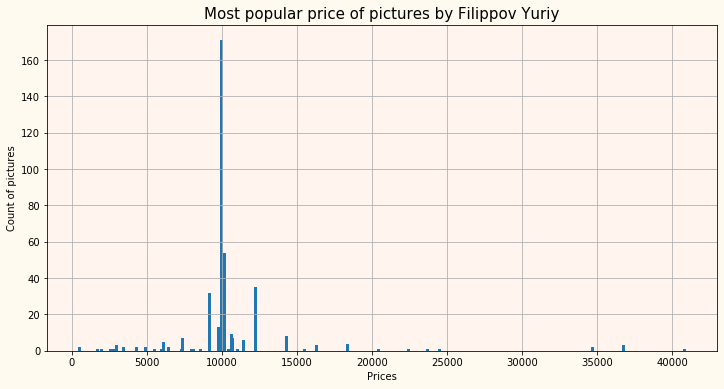

In [19]:
gf.bar_count_prices(temp_df['price'], temp_df['name'], 'Filippov Yuriy')

We see that pretty much price about 10000 euros. If we need exact value we can check it on temp_df dataframe.

But one picture outlier from the group and has a huge price. Let's try to understand why.

In [20]:
df[(df['author'] == 'Filippov Yuriy') & (df['price'] == 40860)]

,author,name,material,technic,genre,style,v_size,h_size,year,price
2602,Filippov Yuriy,Seeing the Russian winter. Festivities,Canvas,Oil,Landscape,Realism,212,340,1964,40860.0


Let's see the correlation between price and year painting pictures. Maybe the oldest pictures has the highest price.

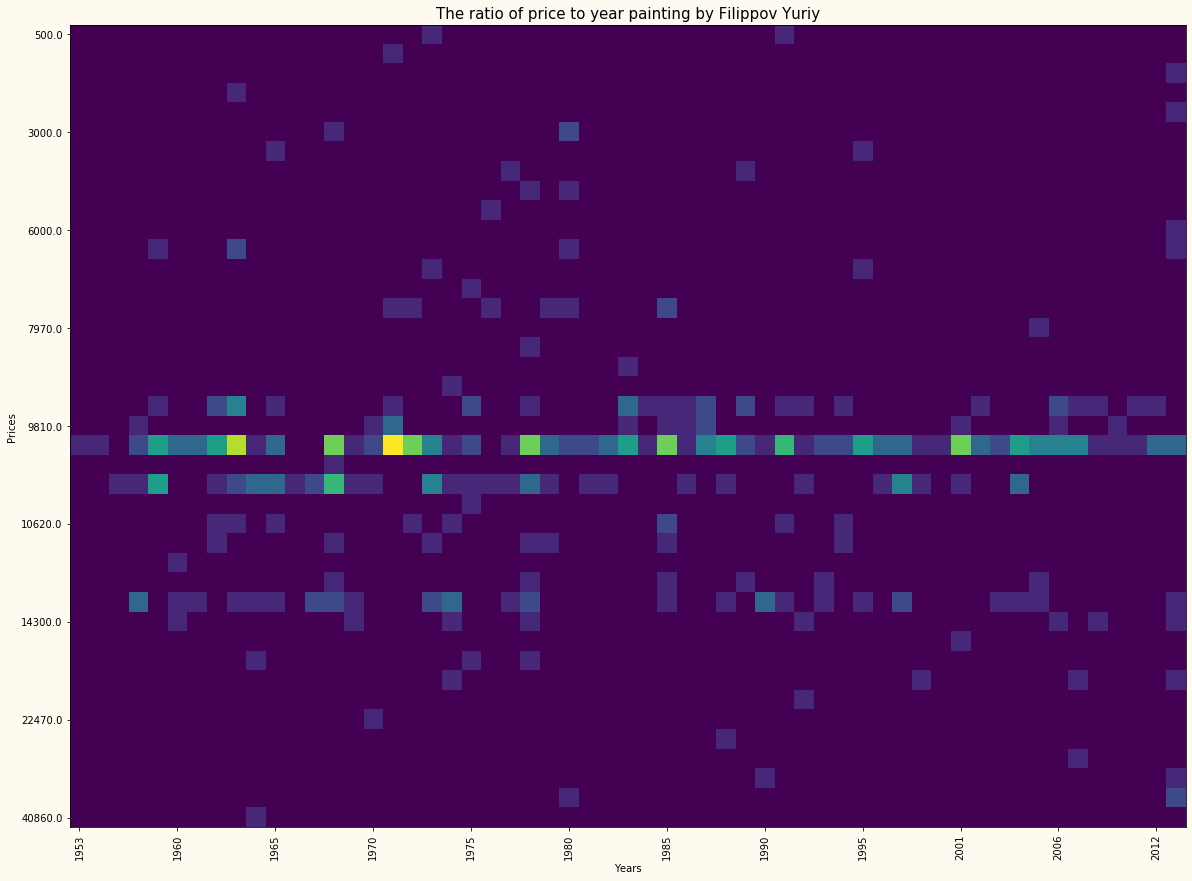

In [21]:
x = df['year'][df['author'] == 'Filippov Yuriy']
y = df['price'][df['author'] == 'Filippov Yuriy']


gf.crosstab_graph(x, y, 'Filippov Yuriy')

There's no correlation between price and year. The last row of the graph is the 'Unknown' year, but anyway it's don't change the big picture.
Now we will check the correlation between the price and square of the picture. Maybe the biggest picture has the highest price.
But for the beginning we add to our dataframe column 'square'.

I have some trouble with a type of value in columns v_size and h_size, so here we reducible value to type float.

In [22]:
#some value end up to '.' we add '0' in the end and then can change type to float
for i in range(len(df['v_size'])):
    try:
        if df['v_size'].iloc[i].endswith('.'):
            df['v_size'].iloc[i] += '0'
    except AttributeError:
        None
for i in range(len(df['h_size'])):
    try:
        if df['h_size'].iloc[i].endswith('.'):
            df['h_size'].iloc[i] += '0'
    except AttributeError:
        None

df = df.astype({'v_size': float, 'h_size': float})

C:\Users\Andrew\Anaconda3\envs\torch3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
df['square'] = df.apply(lambda row: row.v_size * row.h_size, axis=1)

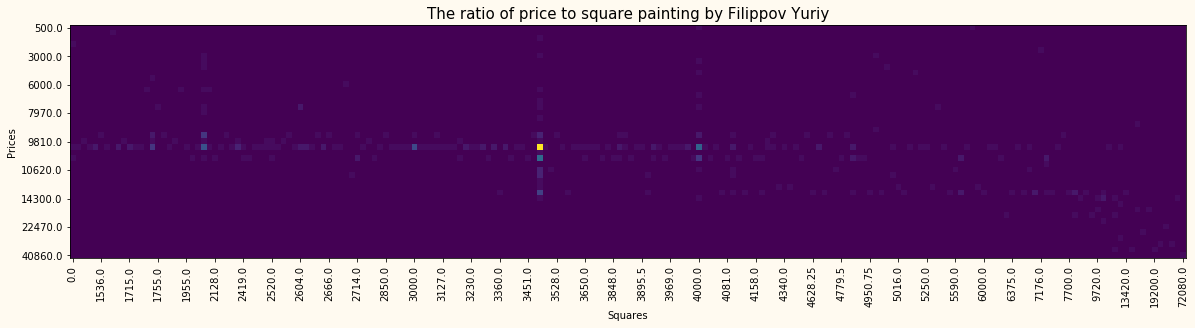

In [24]:
x = df['square'][df['author'] == 'Filippov Yuriy']
y = df['price'][df['author'] == 'Filippov Yuriy']

gf.crosstab_graph(x, y, 'Filippov Yuriy')

Ok, here we can see the correlation between price and size of the picture. It's not brightly noticeable but she is really here.

I have checked the correlation on authors who have more than 100 pictures. Authors 'Guzenko Pavel', 'Kolosov Andrey', 'Micnik Aleksandr' have a strongly marked price on their pictures. But the other 15 authors have a correlation between the size of the picture and the price. And than a more diverse price then stronger correlation.

So if you are beginning author, then for more profit write a bigger picture. Actually one of the brightest new star of Russian art Arseniy 'Pokras Lampas' Pyzhenko become famous because of 100-1000 square metres calligraphic art objects.

And no one authors don't have a correlation between price and year, material, style and genre.

Move on to the next feature 'style'. Let's count basic specifications.

In [26]:
df['style'].unique()

array(['Impressionism', 'Expressionism', 'Abstract art', 'Realism',
       'Conceptual art', 'Naive art', 'Symbolism', 'Surrealism',
       'Unknown'], dtype=object)

In [27]:
df.groupby(['style']).agg({'name': ['count'], 'price': ['mean', 'min', 'max']})

name        price                 
               count         mean    min       max
style                                             
Abstract art    1418  3504.033850  250.0  220000.0
Conceptual art   295  4129.084746  500.0   36860.0
Expressionism    441  3916.780045  500.0   46430.0
Impressionism   3593  2246.681046  300.0  135000.0
Naive art        148  3035.202703   80.0   26800.0
Realism         3453  2996.332175  210.0   63000.0
Surrealism       136  3089.338235  500.0   10000.0
Symbolism       1448  3087.161602   80.0  220000.0
Unknown           68   769.558824  500.0    3430.0

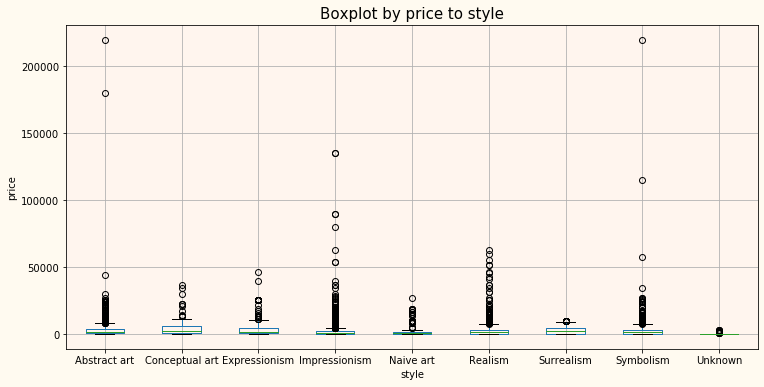

In [28]:
gf.boxplot_graph(df, 'price', 'style')

Ok, we have a deal with outliers here. We must remove them for a more accurate analysis.

But how much price must we remove here?

In [29]:
df['price'][df['price']>13000].count()

232

232 is 2.1% (232/11000*100%) of the total number of prices. I think we can sacrifice them.

In [30]:
test_df = df[df['price']<=13000]

In [31]:
test_df.groupby(['style']).agg({'name': ['count'], 'price': ['mean', 'min', 'max']})

name        price                
               count         mean    min      max
style                                            
Abstract art    1366  2591.734993  250.0  12800.0
Conceptual art   283  3372.438163  500.0  11430.0
Expressionism    423  3044.278960  500.0  13000.0
Impressionism   3543  1835.014112  300.0  12860.0
Naive art        136  1774.632353   80.0  10000.0
Realism         3403  2672.305319  210.0  13000.0
Surrealism       136  3089.338235  500.0  10000.0
Symbolism       1410  2415.950355   80.0  12800.0
Unknown           68   769.558824  500.0   3430.0

In [32]:
print(type(test_df))

<class 'pandas.core.frame.DataFrame'>


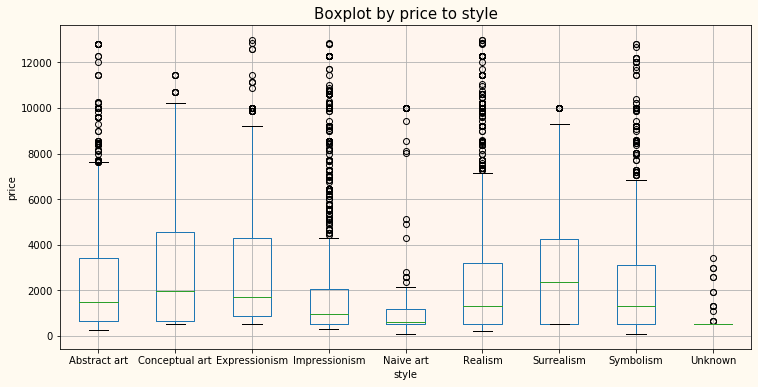

In [31]:
gf.boxplot_graph(test_df, 'price', 'style')

We see that much valued 'Conceptual art', 'Surrealism' and 'Expressionism' style with small amount of pictures but has the biggest median and third quartile.

Let's do the same with the genre.

In [32]:
df['genre'].unique()

array(['Landscape', 'Portrait', 'Abstraction', 'Genre painting',
       'Nude and erotic', 'Still life', 'Flowers', 'Religion and myth',
       'Animals', 'Unknown'], dtype=object)

In [33]:
df.groupby(['genre']).agg({'name': ['count'], 'price': ['mean', 'min', 'max']})

name        price                 
                  count         mean    min       max
genre                                                
Abstraction        1409  3131.376863  230.0  115000.0
Animals             300  2292.983333  230.0   25710.0
Flowers             925  1625.751351  210.0   24570.0
Genre painting     1097  4072.757521  210.0  220000.0
Landscape          4996  2770.799640   80.0  135000.0
Nude and erotic     182  4428.186813  420.0   60000.0
Portrait            903  3668.156146  250.0   51430.0
Religion and myth    81  3120.987654  300.0   34290.0
Still life         1089  2145.674931  500.0   30000.0
Unknown              18  5688.333333  500.0   21390.0

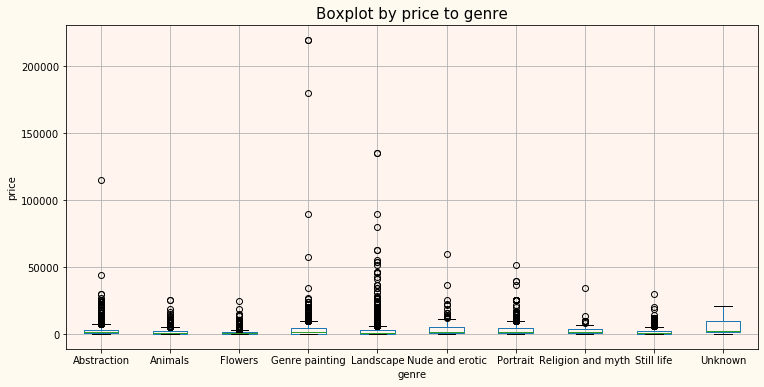

In [34]:
gf.boxplot_graph(df, 'price', 'genre')

And see the same picture. Now we will remove outliers and try again.

In [35]:
test_df.groupby(['genre']).agg({'name': ['count'], 'price': ['mean', 'min', 'max']})

name        price                
                  count         mean    min      max
genre                                               
Abstraction        1363  2451.936904  230.0  12800.0
Animals             293  1907.389078  230.0  12860.0
Flowers             920  1540.336957  210.0  10860.0
Genre painting     1056  2867.021780  210.0  13000.0
Landscape          4916  2344.457893   80.0  12860.0
Nude and erotic     171  3188.947368  420.0  12800.0
Portrait            869  2947.059839  250.0  12860.0
Religion and myth    79  2592.405063  300.0  10000.0
Still life         1085  2077.087558  500.0  12260.0
Unknown              16  3901.875000  500.0  10000.0

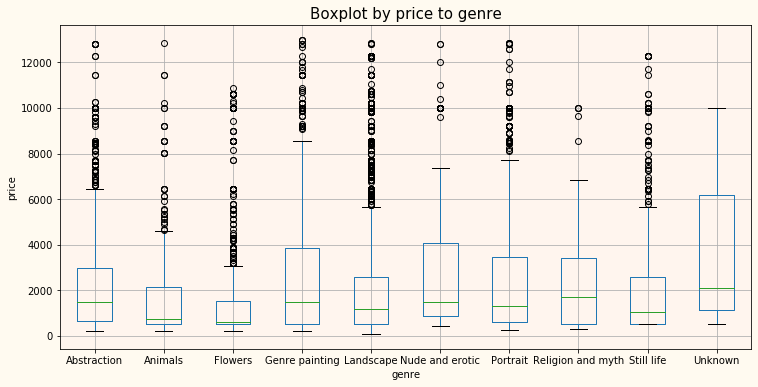

In [36]:
gf.boxplot_graph(test_df, 'price', 'genre')

We are not considering the 'Unknown' style because this group very small. We see that much valued 'Nude and erotic', 'Genre painting' or 'Portrait'.

The column 'material' has many errors, so let's fix that.

In [37]:
df['material'].unique()

array(['Холст', 'Картон', 'Canvas', 'Plastic', 'Polycarbonate',
       'Fiberboard', 'Cardboard', 'paper', 'ДВП', 'Panel', 'Нить',
       'Canvas/cardboard', 'Бумага', 'Мешковина', 'Оргалит', 'Ватман',
       'Плекс', 'Дерево', 'Дерево-панель', 'plywood',
       'ЕвгенийЖанр:ПейзажСтиль:ИмпрессионизмРазмер:40', 'Paper',
       'canvas', 'Oil', 'Принт', 'Драп', 'Хлопок', 'Лен',
       'Новозеландская', 'Алюминий', 'Шерсть', 'Полированная',
       'Бан.ткань', 'ДСП', 'Кованная', 'Черный', 'Кованая', 'Выжигание',
       'ФотоFiberboard', 'Год:', 'Canvas/Fiberboard', 'Гофроcardboard',
       'Пластик', '\xa0Canvas', 'Папье', 'Гипсоcardboard',
       'paper, штукатурка', 'Доска', '\xa0-', 'Лён', 'Медь',
       'Canvas, Cardboard', 'cardboard', 'silk', 'Папье-маше, эпоксидная',
       'Линогравюра', 'Керамическая', 'Офортная',
       'Дерево, железо, пластик, стекло, стразы', 'Металл', 'Ткань',
       'Крашенный', 'paper, ДСП, стекло',
       'Дерево, железо, стекло, пластик', 'Дерево, желез

In [38]:
df.loc[(df['material'] == 'ЕвгенийЖанр:ПейзажСтиль:ИмпрессионизмРазмер:40'), 'material'] = 'Unknown'
df.loc[(df['material'] == 'Холс'), 'material'] = 'Холст'
df.loc[(df['material'] == '\xa0Canvas'), 'material'] = 'Canvas'
df.loc[(df['material'] == 'canvas'), 'material'] = 'Canvas'
df.loc[(df['material'] == 'Canvas.'), 'material'] = 'Canvas'
df.loc[(df['material'] == 'Канвас'), 'material'] = 'Canvas'
df.loc[(df['material'] == '\xa0-'), 'material'] = 'Unknown'
df.loc[(df['material'] == 'Год:'), 'material'] = 'Unknown'
df.loc[(df['material'] == 'cardboard'), 'material'] = 'Cardboard'
df.loc[(df['material'] == 'Кртон'), 'material'] = 'Картон'
df.loc[(df['material'] == '<evfuf'), 'material'] = 'Unknown'
df.loc[(df['material'] == 'Бетон, металл, acrylicл'), 'material'] = 'Бетон, металл, acrylic'
df.loc[(df['material'] == 'натуральный'), 'material'] = 'Натуральный'
df.loc[(df['material'] == 'Роллер, paper, Год:'), 'material'] = 'Роллер, paper'
df.loc[(df['material'] == 'Мдф, canvas'), 'material'] = 'МДФ, canvas'
df.loc[(df['material'] == 'Дсп'), 'material'] = 'ДСП'
df.loc[(df['material'] == 'Ручноеткачество,таписерия, Год:'), 'material'] = 'Ручноеткачество,таписерия'
df.loc[(df['material'] == 'Canvas, cardboard'), 'material'] = 'Canvas, Cardboard'
df.loc[(df['material'] == 'Canvas,cardboard'), 'material'] = 'Canvas, Cardboard'
df.loc[(df['material'] == 'Дпв'), 'material'] = 'ДВП'
df.loc[(df['material'] == 'Лен'), 'material'] = 'Лён'
df.loc[(df['material'] == 'Кованная'), 'material'] = 'Кованая'
df.loc[(df['material'] == 'Другая'), 'material'] = 'Unknown'
df.loc[(df['material'] == 'Другое'), 'material'] = 'Unknown'
df.loc[(df['material'] == 'Fiberboard, canvas'), 'material'] = 'Canvas, Fiberboard'
df.loc[(df['material'] == 'paper'), 'material'] = 'Paper'

In [39]:
df['material'].nunique()

125

We have 125 unique categories for now. Actually some of them it's the same category but on the different languages, stay it for a while. We just want to see the most popular categories.

In [40]:
temp_df = df.groupby(['material']).agg({'name': 'count'}).reset_index()
temp_df.sort_values(('name'),ascending=False).iloc[:10]

,material,name
0,Canvas,6381
16,Paper,1731
7,Cardboard,1287
11,Fiberboard,604
6,Canvas/cardboard,174
118,Холст,98
54,Дерево,64
24,plywood,63
111,"Ткань, лимонно-кислое",44
87,Нить,41


We see that just 5 from 125 categories have more than 100 pictures.

Now go to the 'technic' column.

In [41]:
df['technic'].unique()

array(['Масло', 'Print', 'Acrylic', 'Collage', 'Oil', 'watercolor',
       'pastel', 'acrylic', 'Гобелен', 'Сухая', 'gouache', 'Пастель',
       'Акварель', 'Смешанная', 'Акрил', 'charcoal', 'mixed', 'Темпера',
       'Сепия', 'silkография', 'Mixed',
       'ЕвгенийЖанр:ПейзажСтиль:ИмпрессионизмРазмер:40', 'Watercolor',
       'Ручная', 'oil', 'Офорт', 'Печать', 'Монотипия', 'Графит',
       'Digital', 'Интарсия', 'Смеш.техника', 'Пиганов', 'Цветная',
       'Тушь', 'Линогравюра', 'Эмаль', 'Лён', 'Эмали', 'Графика',
       'См.тех.', 'Смеш.', 'Восковая', 'Ковка', 'Фетр', 'Авторская',
       '\xa0acrylic', 'Материал:', 'acrylic/эмаль', 'Чернила', 'penсilи',
       'Коллаж', 'Oil, acrylic', 'Canvas', 'acrylic, смеш.', '\xa0Oil',
       'Oil, charcoal', 'Маркеры', 'pastel, штукатурка', 'Темпера, воск',
       'acrylic, гель', 'pastel, гель', 'Резьба', 'penсil',
       'acrylic, темпера', 'Oil, поталь', 'acrylic, гипс', 'acrylic, oil',
       'acrylic, лепнина', 'Батик', 'Гель', 'Oil, суса

In [42]:
df.loc[(df['technic'] == 'ЕвгенийЖанр:ПейзажСтиль:ИмпрессионизмРазмер:40'), 'technic'] = 'Unknown'
df.loc[(df['technic'] == 'Материал:'), 'technic'] = 'Unknown'
df.loc[(df['technic'] == 'Морозкина'), 'technic'] = 'Unknown'
df.loc[(df['technic'] == 'Художник:'), 'technic'] = 'Unknown'
df.loc[(df['technic'] == 'acrylic'), 'technic'] = 'Acrylic'
df.loc[(df['technic'] == '\xa0acrylic'), 'technic'] = 'Acrylic'
df.loc[(df['technic'] == 'acrylicовая'), 'technic'] = 'Acrylic'
df.loc[(df['technic'] == 'watercolor'), 'technic'] = 'Watercolor'
df.loc[(df['technic'] == 'oil'), 'technic'] = 'Oil'
df.loc[(df['technic'] == '\xa0Oil'), 'technic'] = 'Oil'
df.loc[(df['technic'] == 'Эмали'), 'technic'] = 'Эмаль'
df.loc[(df['technic'] == 'См.тех.'), 'technic'] = 'Смешанная'
df.loc[(df['technic'] == 'Смеш.техника'), 'technic'] = 'Смешанная'
df.loc[(df['technic'] == 'Смеш.'), 'technic'] = 'Смешанная'
df.loc[(df['technic'] == 'смеш.техника'), 'technic'] = 'Смешанная'
df.loc[(df['technic'] == 'смеш.'), 'technic'] = 'Смешанная'
df.loc[(df['technic'] == 'penсilи'), 'technic'] = 'penсil'
df.loc[(df['technic'] == 'acrylic, oil'), 'technic'] = 'Oil, acrylic'
df.loc[(df['technic'] == 'acrylic,\xa0Oil'), 'technic'] = 'Oil, acrylic'
df.loc[(df['technic'] == 'acrylic/эмаль'), 'technic'] = 'acrylic, эмаль'
df.loc[(df['technic'] == 'gouache, acrylic'), 'technic'] = 'acrylic, gouache'
df.loc[(df['technic'] == 'acrylic, смеш.'), 'technic'] = 'acrylic, mixed'
df.loc[(df['technic'] == 'watercolor/gouache'), 'technic'] = 'watercolor, gouache'
df.loc[(df['technic'] == 'Тушь, watercolor'), 'technic'] = 'watercolor, тушь'
df.loc[(df['technic'] == 'watercolor,тушь'), 'technic'] = 'watercolor, тушь'
df.loc[(df['technic'] == 'Цветные'), 'technic'] = 'Цветной'
df.loc[(df['technic'] == 'Цв.'), 'technic'] = 'Цветной'
df.loc[(df['technic'] == 'Цветная'), 'technic'] = 'Цветной'
df.loc[(df['technic'] == 'pastel, тушь'), 'technic'] = 'Тушь, pastel'
df.loc[(df['technic'] == 'Ковка, сварка, колер, Материал:'), 'technic'] = 'Ковка, сварка, колер'
df.loc[(df['technic'] == 'acrylic, темпера'), 'technic'] = 'Темпера, acrylic'
df.loc[(df['technic'] == 'watercolor/acrylic'), 'technic'] = 'watercolor, acrylic'
df.loc[(df['technic'] == 'acrylic, watercolor, Материал:'), 'technic'] = 'acrylic, watercolor'
df.loc[(df['technic'] == 'acrylic, pastel, Материал:'), 'technic'] = 'acrylic, pastel'
df.loc[(df['technic'] == 'acrylic, watercolor, pastel'), 'technic'] = 'acrylic, pastel, watercolor'
df.loc[(df['technic'] == 'penсil, acrylic'), 'technic'] = 'acrylic, penсil'
df.loc[(df['technic'] == 'acrylic.'), 'technic'] = 'Acrylic'
df.loc[(df['technic'] == 'watercolor, acrylic'), 'technic'] = 'acrylic, watercolor'
df.loc[(df['technic'] == 'Пиганов'), 'technic'] = 'Unknown'
df.loc[(df['technic'] == 'Тушь, белила, watercolor'), 'technic'] = 'Белила, тушь, watercolor'
df.loc[(df['technic'] == 'watercolorные'), 'technic'] = 'Watercolor'
df.loc[(df['technic'] == 'watercolor, watercolorные'), 'technic'] = 'Watercolor'
df.loc[(df['technic'] == 'watercolor, pastel'), 'technic'] = 'pastel, watercolor'
df.loc[(df['technic'] == 'Oil,acrylic,смеш.т-ка'), 'technic'] = 'acrylic, oil, mixed'
df.loc[(df['technic'] == 'Oil,acrylic, смеш.техника'), 'technic'] = 'acrylic, oil, mixed'
df.loc[(df['technic'] == 'Oil,acrylic'), 'technic'] = 'Oil, acrylic'
df.loc[(df['technic'] == 'penсil, сепия'), 'technic'] = 'Сепия,penсil'
df.loc[(df['technic'] == 'Темпера, penсilи'), 'technic'] = 'Темпера, penсil'
df.loc[(df['technic'] == 'mixed'), 'technic'] = 'Mixed'
df.loc[(df['technic'] == 'Фломастеры, тушь'), 'technic'] = 'Тушь, фломастеры'
df.loc[(df['technic'] == 'Фломастеры, тушь, клеевая'), 'technic'] = 'Тушь, фломастеры, клеевая'
df.loc[(df['technic'] == 'Восковые'), 'technic'] = 'Воск'
df.loc[(df['technic'] == 'Восковая'), 'technic'] = 'Воск'
df.loc[(df['technic'] == 'авторская'), 'technic'] = 'Авторская'
df.loc[(df['technic'] == 'калька, лак'), 'technic'] = 'Калька, лак'
df.loc[(df['technic'] == 'Гелевые'), 'technic'] = 'Гель'
df.loc[(df['technic'] == 'Гелевая'), 'technic'] = 'Гель'
df.loc[(df['technic'] == 'Фломастер'), 'technic'] = 'Фломастеры'

In [43]:
df['technic'].nunique()

189

In [44]:
temp_df = df.groupby(['technic']).agg({'name': 'count'}).reset_index()
temp_df.sort_values(('name'),ascending=False).iloc[:10]

,technic,name
7,Oil,7400
0,Acrylic,669
30,Watercolor,581
67,pastel,279
149,Смешанная,226
6,Mixed,173
8,"Oil, acrylic",115
83,Авторская,97
154,Темпера,89
126,Масло,88


That is all. We cleared data, counted some statistics and found dependence between the size of the picture and price.